<a href="https://colab.research.google.com/github/Q-types/Projects/blob/main/David_McCann_CAM_DS_C101_Activity_4_1_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**First things first** - please go to 'File' and select 'Save a copy in Drive' so that you have your own version of this activity set up and ready to use.
Remember to update your Course 1 notebook with links to your own work once completed!

# Activity 4.1.8 Selecting features

## Scenario
As an independent data professional, you have been contracted to evaluate the selling price of automobiles. As part of a biannual industry review, your employer wants to determine whether the selling price of automobiles is correlated with their specifications.

You have been provided with a data set, **automobiles.csv**, containing the current selling prices and specifications from randomly selected manufacturers. The data set contains 205 rows and 26 features. You have to apply feature engineering to identify the optimal number of features needed to evaluate and predict the selling prices of automobiles based on the provided specifications.


## Objective
The goal is to apply feature engineering methods to preprocess the data, perform feature selection, and evaluate how feature engineering and selection affect the performance of a predictive model.


## Assessment criteria:
By completing this activity, you will be able to provide evidence that you can:
*   Apply data preprocessing methods to prepare the data for analysis.
*   Perform feature learning and feature selection to optimise the model’s performance.


## Activity guidance:
1. Import the relevant libraries for data analysis, visualisation, and machine learning.
2. Explore the data set to understand the features.
3. Create target and input features DataFrames.
4. Preprocess the data, handling missing values and encoding categorical variables as needed.
5. Apply feature scaling.
6. Determine if there is multicollinearity.
7. Determine the importance of features with mutual information (MI) and perform feature selection with recursive feature elimination (RFE).

In [48]:
# Import the required libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import the automobiles.csv file (data set) from GitHub with a url.
url = "https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/automobiles.csv"

In [49]:
# Create dataframe of the features and target
x = pd.read_csv(url)

In [50]:
# Inspect the dataset
print(x.head())
print(x.columns)
print(x.dtypes)


   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

Due to a lot of the features being non numerical, we need to transform these features.

Each feature with just a few unique entries is suitable for one-hot encoding. The car name feature needs ot be handles differently to not introduce a large amount of noise. For this I will keep only brand, then encode brand name.

In [51]:
# Features with non-numerical values
non_n_features = x.columns[x.dtypes == object]

#

# Creating Brand feature
for name in x['CarName'].unique():
  x['Brand'] = x['CarName'].str.split(' ').str[0]
print(x['Brand'].unique())


['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [52]:
# Mapping brand misspelling to correct brand

brand_map = {
    'vw': 'volkswagen',
    'vokswagen': 'volkswagen',
    'volkswagen': 'volkswagen',

    'maxda': 'mazda',

    'toyouta': 'toyota',

    'porcshe': 'porsche',

    'alfa-romero': 'alfa-romeo',  # if you want to standardise this too

    'nissan': 'nissan',           # to unify 'Nissan'/'nissan' after lowercase
}

# 2. Apply the mapping
x['Brand'] = x['Brand'].replace(brand_map)

print(sorted(x['Brand'].unique()))

x.drop('CarName', axis=1)

non_n_features = x.columns[x.dtypes == object]

print(f'Final list of non-numerical features:\n {non_n_features}')

['Nissan', 'alfa-romeo', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porcshce', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']
Final list of non-numerical features:
 Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'Brand'],
      dtype='object')


In [53]:
# One-hot encoding catagorical data
for key in non_n_features:
  x = pd.get_dummies(x, columns=[key])

print(x.columns)


Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       ...
       'Brand_peugeot', 'Brand_plymouth', 'Brand_porcshce', 'Brand_porsche',
       'Brand_renault', 'Brand_saab', 'Brand_subaru', 'Brand_toyota',
       'Brand_volkswagen', 'Brand_volvo'],
      dtype='object', length=225)


In [54]:
# Remove unnessassary fetures
x = x.drop(['car_ID'], axis=1)
print(x.columns)


Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       ...
       'Brand_peugeot', 'Brand_plymouth', 'Brand_porcshce', 'Brand_porsche',
       'Brand_renault', 'Brand_saab', 'Brand_subaru', 'Brand_toyota',
       'Brand_volkswagen', 'Brand_volvo'],
      dtype='object', length=224)


In [55]:
# Creating a data frame for target and features

X = pd.DataFrame(x.drop(['price'], axis=1))
y = pd.DataFrame(x['price'])

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (205, 223)
y shape: (205, 1)


The data is now ready to use for training. Further feature selection will be used and a comparison of models will be made.

In [56]:
# Train Test Split model 1
from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X, y,
                                                      random_state=10)

In [57]:
# Feature importance using mutual info for regression

# MI method
from sklearn.feature_selection import mutual_info_regression
mi_score = mutual_info_regression(X, y)

print(mi_score)



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2.05194047e-01 5.84047198e-01 5.58700143e-01 6.53191436e-01
 3.44884017e-01 8.60618579e-01 8.26162507e-01 4.63145307e-01
 3.71433401e-01 1.82206580e-01 8.61349464e-01 1.81015882e-01
 7.25220521e-01 8.50591543e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.63462458e-03
 1.62601626e-03 2.22044605e-15 2.22044605e-15 1.62601626e-03
 3.22812052e-03 1.62601626e-03 0.00000000e+00 0.00000000e+00
 1.62601626e-03 1.62601626e-03 1.62601626e-03 3.25203252e-03
 1.62601626e-03 2.22044605e-15 1.62601626e-03 3.25203252e-03
 0.00000000e+00 0.00000000e+00 1.62601626e-03 0.00000000e+00
 2.22044605e-15 3.25203252e-03 2.33146835e-15 0.00000000e+00
 4.87804878e-03 2.22044605e-15 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.62601626e-03 1.60210426e-03 2.22044605e-15
 2.22044605e-15 0.00000000e+00 0.00000000e+00 4.87804878e-03
 2.22044605e-15 0.00000000e+00 1.62601626e-03 0.00000000e+00
 2.22044605e-15 1.62601626e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.252032

In [58]:
# Find the column number of features (original data set) where MI > 0.1.
mi_score_selected_index = np.where(mi_score > 0.1)[0]

# View the columns.
print("Index numbers of features with MI > 0.1:", mi_score_selected_index)

# Create a subset of the data containing features with MI > 0.1.
X_2 = X.iloc[:, mi_score_selected_index]
print(X_2.columns)

Index numbers of features with MI > 0.1: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13 173 174 180 186
 187 192 196 203]
Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_ohc', 'cylindernumber_four',
       'cylindernumber_six', 'fuelsystem_2bbl', 'fuelsystem_mpfi',
       'Brand_buick'],
      dtype='object')


In [59]:
# Train Test Split model 2

X2_train, X2_test, y_train, y_test = train_test_split(X_2, y,
                                                      random_state=10)


In [60]:
# Feature Selection with Auto select

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

selector_1 = SelectKBest(f_regression, k=10)
selector_1.fit(X_2, y)

selector_2 = SelectKBest(mutual_info_regression, k=15)
selector_2.fit(X_2, y)

X2_reduced_best = selector_1.transform(X_2)
X2_reduced_mi = selector_2.transform(X_2)

print(X2_reduced_best.shape)
print(X2_reduced_mi.shape)

(205, 10)
(205, 15)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
# train test split model 3 and 4

X3_train, X3_test, y_train, y_test = train_test_split(X2_reduced_best, y,
                                                      random_state=10)
X4_train, X4_test, y_train, y_test = train_test_split(X2_reduced_mi, y,
                                                      random_state=10)


In [62]:
# Compare the accuracy of the original data set, data set with MI > 0.1, and data set with MI < 0.1.
from sklearn.tree import DecisionTreeRegressor

# Run the DecisionTreeClassifier on the three models.
model_1 = DecisionTreeRegressor().fit(X1_train, y_train)
model_2 = DecisionTreeRegressor().fit(X2_train, y_train)
model_3 = DecisionTreeRegressor().fit(X3_train, y_train)
model_4 = DecisionTreeRegressor().fit(X4_train, y_train)

# Create the accuracy score.
score_1 = model_1.score(X1_test, y_test)
score_2 = model_2.score(X2_test, y_test)
score_3 = model_3.score(X3_test, y_test)
score_4 = model_4.score(X4_test, y_test)

# View the scores.
print(f"Model 1: {score_1}\n Model 2: {score_2}\n Model 3: {score_3}\n Model 4: {score_4}")

Model 1: 0.8615643144068252
 Model 2: 0.8845118515800304
 Model 3: 0.8496909576960521
 Model 4: 0.8696352277126597


In [63]:
# Get the Boolean mask indicating which features are selected.
selected_features_mask_1 = selector_2.get_support()
selected_features_mask_2 = selector_1.get_support()

# Find the indices of the selected features.
selected_features_indices_1 = np.where(selected_features_mask_1)[0]
selected_features_indices_2 = np.where(selected_features_mask_2)[0]

# Print the indices of the selected features.
print("Indices of selected features (Model 3):", selected_features_indices_1)
print("Indices of selected features (Model 4):", selected_features_indices_2)

Indices of selected features (Model 3): [ 1  2  3  4  5  6  7  8 10 12 13 14 15 19 20]
Indices of selected features (Model 4): [ 2  3  5  6 10 12 13 14 15 17]


In [64]:
# Employ recursive feature elimination (RFE).
from sklearn.feature_selection import RFE

rfe = RFE(DecisionTreeRegressor(), n_features_to_select=10, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_

# View the ranking of features.
print(ranking)

# Transform the data.
X_selected_RFE = rfe.transform(X)

# View the shape of the data.
X_selected_RFE.shape

[ 19   1   1   1   1   1   1  16   1   3   1 197   5   1 212 214 213   4
 211 210 209 208 207 206 205 204 202   8   2 144 159 153 173 171 172 203
 170 201 200 199 198 192 196  30 195 194 193 191 190 189 186  34 185 188
 187  18 178 184 183 182 181 180 179  10 177 176  17  28 174 175  24  20
 169 167  14  33 168 151 166 164 165 162 163 161 160 155 158 157 149 156
  36 154  27 152 150 145 148 147   9 146   7 143  26 142 141 140 139 137
 136 135 134 133 131 130 129 128  12  45  37  47  50  13  52  49 138  48
 108 107 106 102 104 132 103 101  25  23  22 126 127  15 122 120 125 119
 121 124 123  40 105 118 117  38 116 115 114 112 113 111 110 109 100  98
  97  99  95  41  29  96  94   6  11  84  93  87  35  92  83  80  91  90
  88  78  86  77  82  76  89  74  71  70  68  75  85  67  81  66  62  32
  79  54  65  73   1  64  63  72  60  59  69  57  58  39  56  61  31  53
  21  51  46  42  44  55  43]


(205, 10)

In [65]:
# train, test, split model 5
X5_train, X5_test, y_train, y_test = train_test_split(X_selected_RFE, y,
                                                      random_state=10)

In [66]:
# View the accuracy of the output.
model_5 = DecisionTreeRegressor().fit(X5_train, y_train)
score_5 = model_5.score(X5_test, y_test)

# View the accuracy scores.
print(f"Model 1: {score_1}")
print(f"Model 5: {score_5}")

Model 1: 0.8615643144068252
Model 5: 0.8938727358240164


In [67]:
# Model comparison and evaluation

# View the scores.
print(f"Model 1: {score_1}\n Model 2: {score_2}\n Model 3: {score_3}\n Model 4: {score_4}\n Model 5: {score_5}")


Model 1: 0.8615643144068252
 Model 2: 0.8845118515800304
 Model 3: 0.8496909576960521
 Model 4: 0.8696352277126597
 Model 5: 0.8938727358240164


--- Model Metrics ---
--- Model 1 ---
R2 Score: 0.8616
Adjusted R2: nan
MSE: 8052898.51
MAE: 2037.16
--- Model 2 ---
R2 Score: 0.8845
Adjusted R2: 0.7969
MSE: 6718024.58
MAE: 1870.27
--- Model 3 ---
R2 Score: 0.8497
Adjusted R2: 0.8130
MSE: 8743579.79
MAE: 2017.10
--- Model 4 ---
R2 Score: 0.8696
Adjusted R2: 0.8153
MSE: 7583407.96
MAE: 2048.42
--- Model 5 ---
R2 Score: 0.8939
Adjusted R2: 0.8680
MSE: 6173495.54
MAE: 1830.31


/tmp/ipython-input-3830193837.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2 Score', data=df_metrics, ax=axes[0, 0], palette='viridis')
/tmp/ipython-input-3830193837.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Adjusted R2', data=df_metrics, ax=axes[0, 1], palette='viridis')
/tmp/ipython-input-3830193837.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=df_metrics, ax=axes[1, 0], palette='viridis')
/tmp/ipython-input-3830193837.py:88: FutureWarning: 

Passing `palette` 

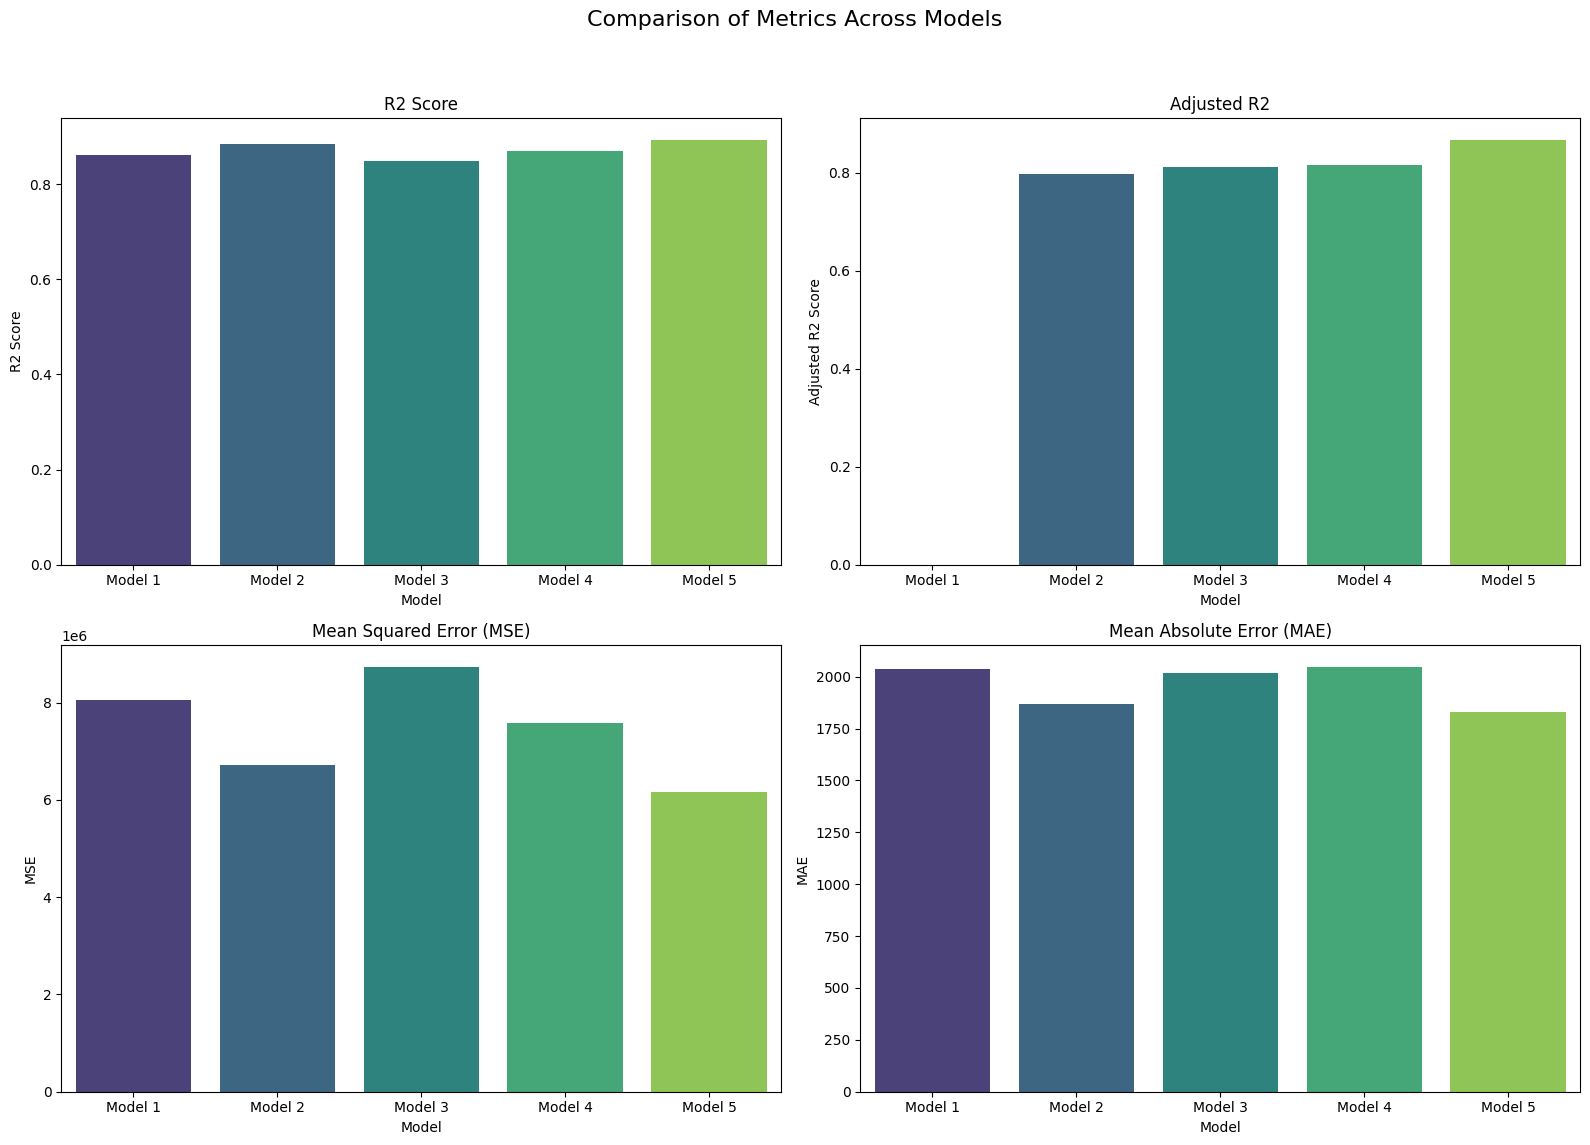

In [78]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def adjusted_r2_score(y_true, y_pred, X_test):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    p = X_test.shape[1] # Number of features
    # Avoid division by zero if n - p - 1 is zero or negative
    if (n - p - 1) <= 0:
        return float('nan') # Return NaN or handle appropriately
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    return adjusted_r2

# models
models = [model_1, model_2, model_3, model_4, model_5]

# Predictions
pred_1 = model_1.predict(X1_test)
pred_2 = model_2.predict(X2_test)
pred_3 = model_3.predict(X3_test)
pred_4 = model_4.predict(X4_test)
pred_5 = model_5.predict(X5_test)

predictions_data = [
    (pred_1, X1_test, 'Model 1'),
    (pred_2, X2_test, 'Model 2'),
    (pred_3, X3_test, 'Model 3'),
    (pred_4, X4_test, 'Model 4'),
    (pred_5, X5_test, 'Model 5')
]

all_metrics = []

print('--- Model Metrics ---')
for pred, X_test_data, model_name in predictions_data:
  current_metrics = {}
  current_metrics['Model'] = model_name

  # R2
  r2 = r2_score(y_test, pred)
  current_metrics['R2 Score'] = r2

  # Adjusted R2
  ar2 = adjusted_r2_score(y_test, pred, X_test_data)
  current_metrics['Adjusted R2'] = ar2

  # MSE
  mse = mean_squared_error(y_test, pred)
  current_metrics['MSE'] = mse

  # MAE
  mae = mean_absolute_error(y_test, pred)
  current_metrics['MAE'] = mae

  all_metrics.append(current_metrics)

  print(f"--- {model_name} ---")
  print(f"R2 Score: {r2:.4f}")
  print(f"Adjusted R2: {ar2:.4f}")
  print(f"MSE: {mse:.2f}")
  print(f"MAE: {mae:.2f}")


# Visulisation of the comparisons
df_metrics = pd.DataFrame(all_metrics)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparison of Metrics Across Models', fontsize=16)

# R2 Score
sns.barplot(x='Model', y='R2 Score', data=df_metrics, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('R2 Score')
axes[0, 0].set_ylabel('R2 Score')

# Adjusted R2
sns.barplot(x='Model', y='Adjusted R2', data=df_metrics, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Adjusted R2')
axes[0, 1].set_ylabel('Adjusted R2 Score')

# MSE
sns.barplot(x='Model', y='MSE', data=df_metrics, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Mean Squared Error (MSE)')
axes[1, 0].set_ylabel('MSE')

# MAE
sns.barplot(x='Model', y='MAE', data=df_metrics, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Mean Absolute Error (MAE)')
axes[1, 1].set_ylabel('MAE')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

In every metric, model 5 performs the best.

In [83]:
# Model features

feature_counts = [X1_train.shape[1],
                  X2_train.shape[1],
                  X3_train.shape[1],
                  X4_train.shape[1],
                  X5_train.shape[1]]

feature_counts

[223, 22, 10, 15, 10]

# Reflect

Write a brief paragraph highlighting your process and the rationale to showcase critical thinking and problem-solving.

> Select the pen from the toolbar to add your entry.